# TP Arbre de décision

# SACKO_M'BALOU_Madhusha_SIVASELVAN_M2SDTS-FI

# I/ Arbres pour la classification

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [4]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [5]:
clf = clf.fit(X, y)

In [6]:
clf.predict([[2., 2.]])

array([1])

In [7]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

# II/ Classification des données Car

#### Etude de l’ Arbre de décision sur une base de données cardata qui contient  six attributs d'entrée : buying, maint, doors, persons, lug_boot, safety.
#### Cette base de données peut être particulièrement utile pour tester les méthodes d'induction constructive et de découverte de structure.

In [8]:
import pandas as pd

#### Consigne : developper une methode pour lire le dataset et l’importer

In [9]:
data=pd.read_csv('car.csv')

In [10]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
data.rename(columns={'vhigh':'buying','vhigh.1':'maint','2':'doors','2.1':'persons','small':'lug_boot','low':'safety','unacc':'Class Values'},inplace=True)

In [12]:
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


#### L'ordianateur ne va pas comprendre ces valeurs qui sont dans notre dataset donc on convertit ces valeurs en chiffres.

In [13]:

data['buying'].replace('vhigh',4,inplace =True)
data['buying'].replace('high',3,inplace =True)
data['buying'].replace('med',2,inplace =True)
data['buying'].replace('low',1,inplace =True)



data['maint'].replace('vhigh',4,inplace =True)
data['maint'].replace('high',3,inplace =True)
data['maint'].replace('med',2,inplace =True)
data['maint'].replace('low',1,inplace =True)


data['doors'].replace('2',2,inplace =True)
data['doors'].replace('3',3,inplace =True)
data['doors'].replace('4',4,inplace =True)
data['doors'].replace('5more',5,inplace =True)

data['persons'].replace('2',2,inplace =True)
data['persons'].replace('4',4,inplace =True)
data['persons'].replace('more',5,inplace =True)


data['lug_boot'].replace('small',1,inplace =True)
data['lug_boot'].replace('med',2,inplace =True)
data['lug_boot'].replace('big',3,inplace =True)

data['safety'].replace('low',1,inplace =True)
data['safety'].replace('med',2,inplace =True)
data['safety'].replace('high',3,inplace =True)

data['Class Values'].replace('unacc',1,inplace =True)
data['Class Values'].replace('acc',2,inplace =True)
data['Class Values'].replace('good',3,inplace =True)
data['Class Values'].replace('vgood',4,inplace =True) 

In [14]:
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,2,3
1723,1,1,5,5,2,3,4
1724,1,1,5,5,3,1,1
1725,1,1,5,5,3,2,3


#### Consigne :  commencer à resoudre le pb en proposant un arbre de decision robuste.

### Question
#### Calculer les statistiques (moyenne et écart-type) des variables explicatives :

In [15]:
import numpy as np
for i in data.columns:
    print('moyenne')
    print(np.mean(data[i]))
    print('ecart-type')
    print(np.std(data[i]))
    print('____________________________')
    

moyenne
2.499131441806601
ecart-type
1.1177746672791624
____________________________
moyenne
2.499131441806601
ecart-type
1.1177746672791613
____________________________
moyenne
3.500868558193399
ecart-type
1.1177746672791624
____________________________
moyenne
3.667631731325999
ecart-type
1.2469350063745335
____________________________
moyenne
2.0005790387955993
ecart-type
0.8163781712226682
____________________________
moyenne
2.0005790387955993
ecart-type
0.8163781712226681
____________________________
moyenne
1.4151708164447019
ecart-type
0.7406324957047
____________________________


### Question
#### Combien y a-t-il d’exemples de chaque classe ?

#### On récupère les targets qui sont dans 'Class Values' de notre dataset dans data_target.

In [16]:
data_target=data['Class Values']

In [17]:
data_target

0       1
1       1
2       1
3       1
4       1
       ..
1722    3
1723    4
1724    1
1725    3
1726    4
Name: Class Values, Length: 1727, dtype: int64

In [18]:
bb,cc=np.unique(data_target,return_counts=True)
print(cc)

[1209  384   69   65]


#### Il y a 1209 fois de (1), 384 fois de (2), 69 fois de (3) et 65 fois de  (4). 

In [19]:
# verification :
1209+384+69+65

1727

In [20]:
data_feature=pd.DataFrame(data, columns = ['buying', 'maint','doors','persons','lug_boot','safety'])

In [21]:
data_feature

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,2
1,4,4,2,2,1,3
2,4,4,2,2,2,1
3,4,4,2,2,2,2
4,4,4,2,2,2,3
...,...,...,...,...,...,...
1722,1,1,5,5,2,2
1723,1,1,5,5,2,3
1724,1,1,5,5,3,1
1725,1,1,5,5,3,2


#### Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [22]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_target, train_size=0.7,
random_state=0)

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

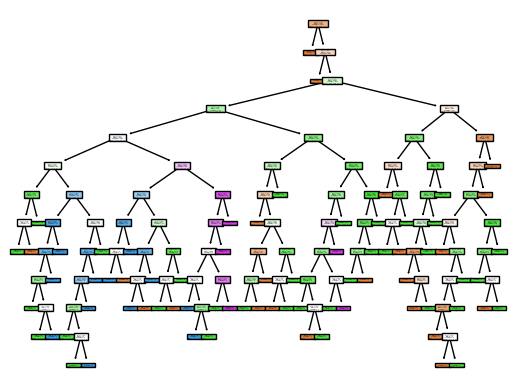

In [24]:
tree.plot_tree(clf, filled=True)
plt.show()

In [25]:
clf.predict(X_test)

array([2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1,
       1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       4, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 4, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 4, 1,

In [26]:
clf.score(X_test, y_test)

0.9807321772639692

#### Changeons les valeurs de parametres max_depth et min_samples_leaf

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

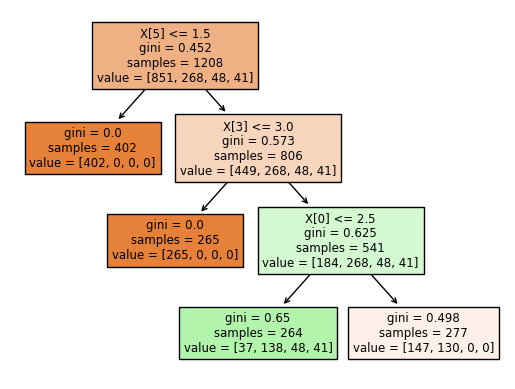

In [28]:
tree.plot_tree(clf, filled=True)
plt.show()

In [29]:
clf.score(X_test, y_test)

0.7996146435452793

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

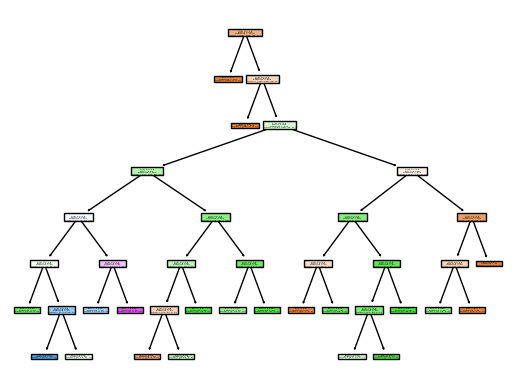

In [31]:
import matplotlib.pyplot as plt
tree.plot_tree(clf, filled=True)
plt.show()

In [32]:
clf.score(X_test, y_test)

0.9479768786127167

#### Avec clf = tree.DecisionTreeClassifier(min_samples_leaf = 20), on a un score de 94% qui est meilleure par rapport à  clf = tree.DecisionTreeClassifier(max_depth = 3) qui a un score de 79%.
#### min_samples_leaf donne le nombre minimal d'échantillons dans un noeud de feuille. Ils permettent de mettre des contraintes sur la construction de l'arbre et de controler le phénomène de sur-apprentissage.

#### Voici l’arbre obtenu avec min_samples_leaf=20. Il a plus d’éléments dans les feuilles, donc moins de nœuds et l’arbre est moins profond.

### Question :
#### Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.
#### Calculez le taux d’éléments mal classifiés sur l’ensemble de test.
#### Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) lesvaleurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.

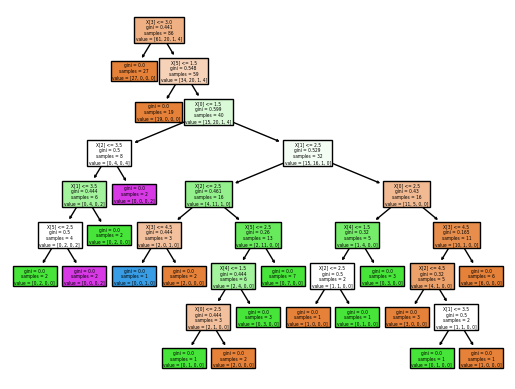

In [39]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_target, train_size=0.05,
random_state=0)

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

tree.plot_tree(clf, filled=True)
plt.show()

In [40]:
clf.score(X_test, y_test)

0.8360755636806825

#### On obtient un score de 83%.  Donc les éléments ne sont pas bien classés.

In [50]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_feature, data_target,
test_size=0.95, random_state=0)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
        "min_samples_split": [2, 4, 6, 8, 10, 16, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

/home/etudiant/anaconda3/envs/sivaselvan/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.8507007921998782

#### L'impact est que l'on obtient un mauvais score. Il est de 85%.

# III/ Affichage de la surface de décision

### Question :
#### Refaire l’affichage pour les autres paires d’attributs. Sur quelle paire la séparation entre les classes est la plus marquée ?

/home/etudiant/anaconda3/envs/sivaselvan/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/etudiant/anaconda3/envs/sivaselvan/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/etudiant/anaconda3/envs/sivaselvan/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/etudiant/anaconda3/envs/sivaselvan/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/etudiant/anaconda3/env

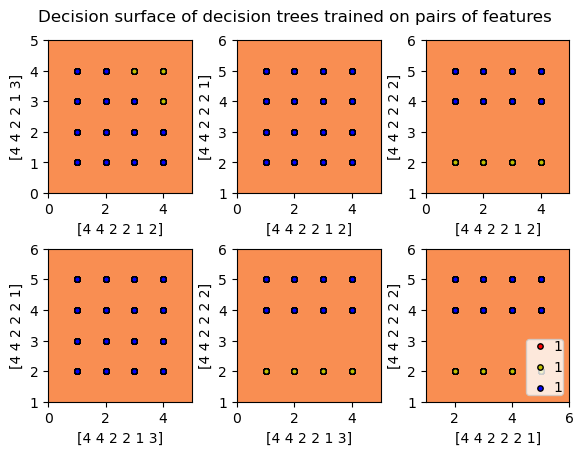

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


#paramètres
n_classes = 4
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
   
    X = data_feature.values[:, pair]
    y = data_target.values

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=data_feature.values[pair[0]],
        ylabel=data_feature.values[pair[1]],
    )

   
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=data_target.values[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")